<a href="https://colab.research.google.com/github/6446779os/Flight-Price-Predictor-Bangladesh-ML-Model/blob/main/Copia_de_Te_damos_la_bienvenida_a_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Resultados:
- Error Absoluto Medio (MAE): 27839.35 BDT
- Coeficiente R²: 0.68


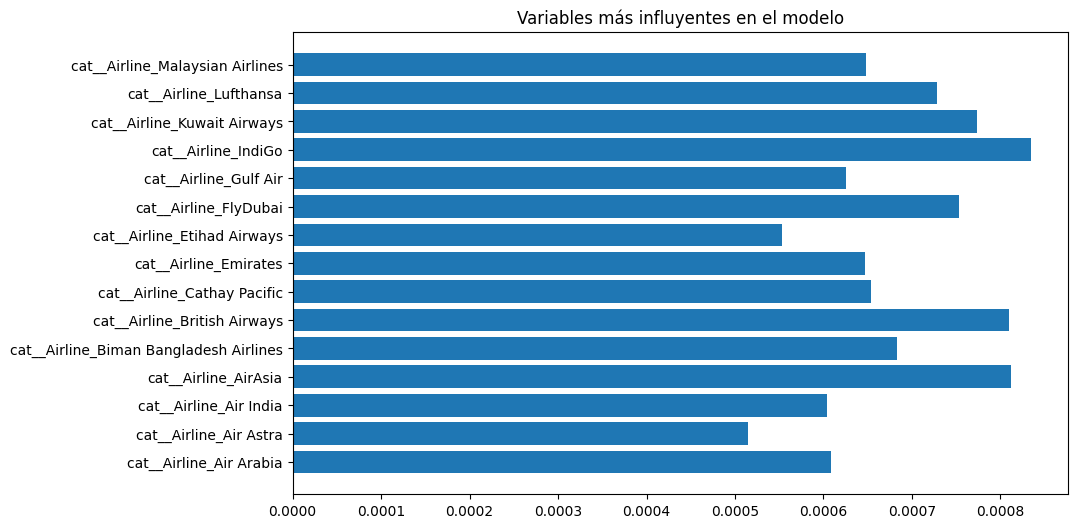


Predicción para vuelo : 113970.82 BDT


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# 1. Cargar datos
df = pd.read_csv("Flight_Price_Dataset_of_Bangladesh.csv")

# 2. Definir features CON LOS NOMBRES CORRECTOS
features = ['Airline', 'Source', 'Destination', 'Duration (hrs)', 'Stopovers',
            'Class', 'Booking Source', 'Seasonality', 'Days Before Departure']  # Nombres exactos del CSV
X = df[features]
y = df['Total Fare (BDT)']  # También verifica este nombre

# 3. Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'),
        ['Airline', 'Source', 'Destination', 'Class', 'Seasonality', 'Stopovers', 'Booking Source']),
        ('num', StandardScaler(), ['Duration (hrs)', 'Days Before Departure'])
    ])

X_processed = preprocessor.fit_transform(X)

# 4. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# 5. Modelo
model = RandomForestRegressor(
    n_estimators=150,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)

# 6. Evaluación
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nResultados:")
print(f"- Error Absoluto Medio (MAE): {mae:.2f} BDT")
print(f"- Coeficiente R²: {r2:.2f}")

# 7. Importancia de variables
importances = model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
plt.figure(figsize=(10, 6))
plt.barh(feature_names[:15], importances[:15])  # Top 15 features
plt.title("Variables más influyentes en el modelo")
plt.show()

# 8. Ejemplo de predicción
ejemplo_vuelo = pd.DataFrame({
    'Airline': ['Biman Bangladesh Airlines'],
    'Source': ['DAC'],
    'Destination': ['DXB'],
    'Duration (hrs)': [4.5],
    'Stopovers': ['Direct'],
    'Class': ['Business'],
    'Booking Source': ['Online Website'],
    'Seasonality': ['Eid'],
    'Days Before Departure': [30]
})

ejemplo_procesado = preprocessor.transform(ejemplo_vuelo)
prediccion = model.predict(ejemplo_procesado)[0]
print(f"\nPredicción para vuelo : {prediccion:.2f} BDT")


Rendimiento del Modelo:
Error Absoluto Medio (MAE): 27836.34 BDT
Coeficiente R²: 0.68


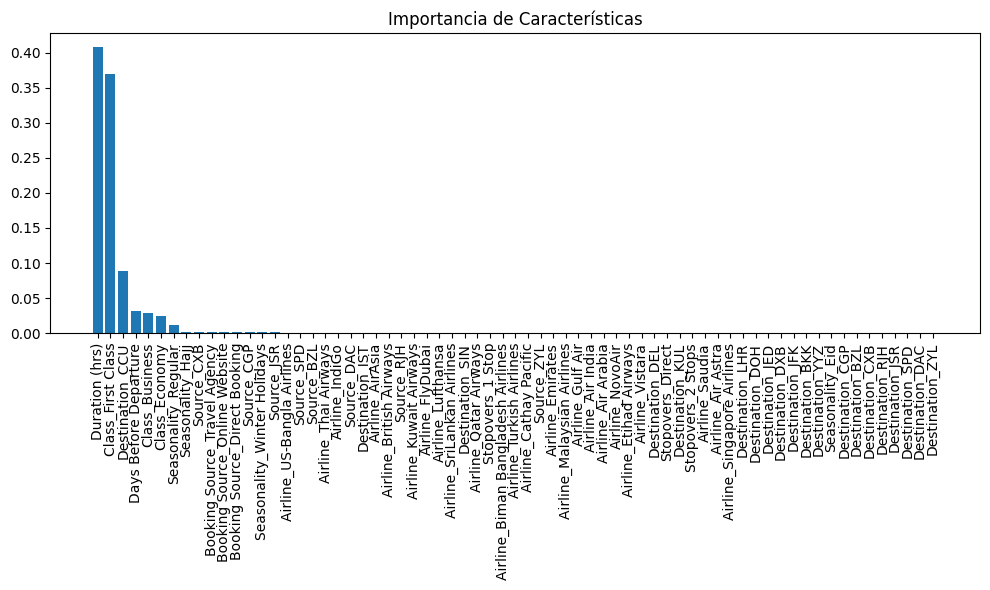


Precio predicho para vuelo de ejemplo: 113666.29 BDT


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def cargar_datos(ruta_archivo):
    """Cargar datos desde un archivo CSV"""
    return pd.read_csv(ruta_archivo)

def preparar_modelo(X, y):
    """Preparar el pipeline de preprocesamiento y modelo"""
    # Identificar características categóricas y numéricas
    caracteristicas_categoricas = [
        'Airline', 'Source', 'Destination',
        'Class', 'Stopovers', 'Booking Source',
        'Seasonality'
    ]
    caracteristicas_numericas = [
        'Duration (hrs)', 'Days Before Departure'
    ]

    # Crear preprocesador
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), caracteristicas_categoricas),
            ('num', StandardScaler(), caracteristicas_numericas)
        ])

    # Crear pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(
            n_estimators=150,
            max_depth=10,
            random_state=42
        ))
    ])

    return pipeline

def entrenar_modelo(pipeline, X_train, X_test, y_train, y_test):
    """Entrenar el modelo y evaluar su rendimiento"""
    # Entrenar modelo
    pipeline.fit(X_train, y_train)

    # Predecir
    predicciones = pipeline.predict(X_test)

    # Calcular métricas
    mae = mean_absolute_error(y_test, predicciones)
    r2 = r2_score(y_test, predicciones)

    return pipeline, mae, r2

def visualizar_importancia_caracteristicas(pipeline, X):
    """Visualizar la importancia de las características"""
    # Obtener nombres de características
    preprocessor = pipeline.named_steps['preprocessor']
    feature_names = (
        preprocessor
        .named_transformers_['cat']
        .get_feature_names_out().tolist() +
        ['Duration (hrs)', 'Days Before Departure']
    )

    # Obtener importancias
    importances = pipeline.named_steps['regressor'].feature_importances_

    # Graficar
    plt.figure(figsize=(10, 6))
    indices = np.argsort(importances)[::-1]
    plt.title("Importancia de Características")
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)),
               [feature_names[i] for i in indices],
               rotation=90)
    plt.tight_layout()
    plt.show()

def predecir_vuelo_ejemplo(pipeline, ejemplo_vuelo):
    """Predecir precio para un vuelo de ejemplo"""
    df_ejemplo = pd.DataFrame([ejemplo_vuelo])
    prediccion = pipeline.predict(df_ejemplo)[0]
    return prediccion

def main():
    # Cargar datos
    try:
        df = cargar_datos("Flight_Price_Dataset_of_Bangladesh.csv")
    except FileNotFoundError:
        print("Error: Archivo no encontrado. Verifica la ruta del archivo.")
        return

    # Preparar características y objetivo
    caracteristicas = [
        'Airline', 'Source', 'Destination', 'Duration (hrs)',
        'Stopovers', 'Class', 'Booking Source', 'Seasonality',
        'Days Before Departure'
    ]
    X = df[caracteristicas]
    y = df['Total Fare (BDT)']

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Preparar modelo
    pipeline = preparar_modelo(X, y)

    # Entrenar modelo
    modelo_entrenado, mae, r2 = entrenar_modelo(
        pipeline, X_train, X_test, y_train, y_test
    )

    # Mostrar resultados
    print(f"\nRendimiento del Modelo:")
    print(f"Error Absoluto Medio (MAE): {mae:.2f} BDT")
    print(f"Coeficiente R²: {r2:.2f}")

    # Visualizar importancia de características
    visualizar_importancia_caracteristicas(modelo_entrenado, X)

    # Ejemplo de predicción
    ejemplo_vuelo = {
        'Airline': 'Biman Bangladesh Airlines',
        'Source': 'DAC',
        'Destination': 'DXB',
        'Duration (hrs)': 4.5,
        'Stopovers': 'Direct',
        'Class': 'Business',
        'Booking Source': 'Online Website',
        'Seasonality': 'Eid',
        'Days Before Departure': 30
    }

    precio_predicho = predecir_vuelo_ejemplo(modelo_entrenado, ejemplo_vuelo)
    print(f"\nPrecio predicho para vuelo de ejemplo: {precio_predicho:.2f} BDT")

# Ejecutar el script principal
if __name__ == "__main__":
    main()

✅ Datos cargados exitosamente


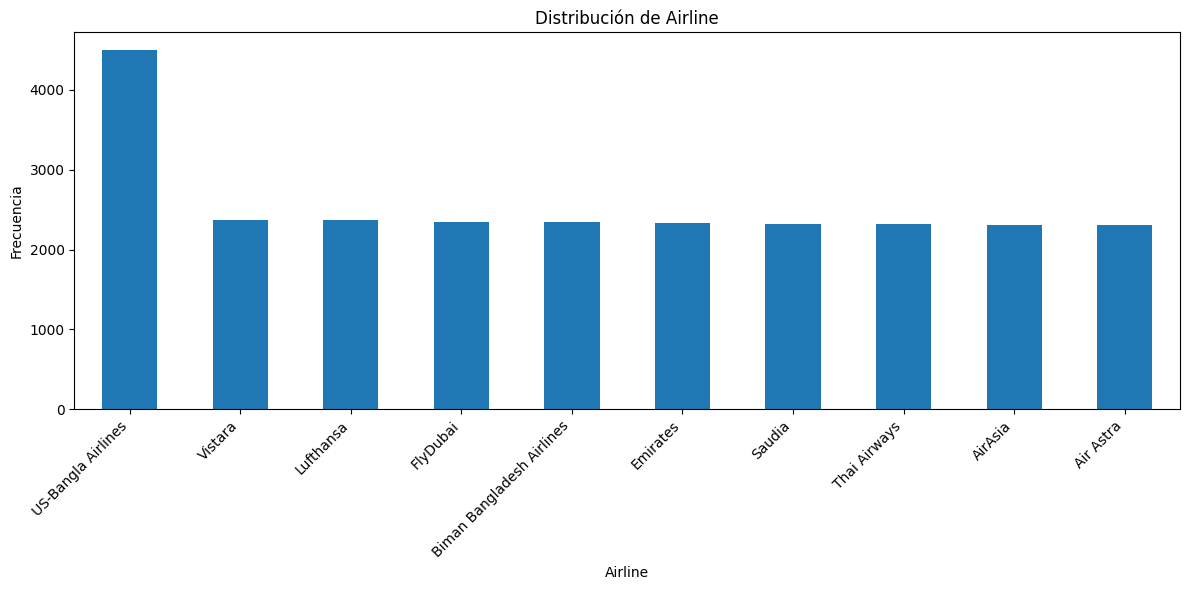


📊 Análisis de Distribución para Airline:
Total de categorías: 24

Top 5 Categorías:
Airline
US-Bangla Airlines           4496
Vistara                      2368
Lufthansa                    2368
FlyDubai                     2346
Biman Bangladesh Airlines    2344
Emirates                     2327
Saudia                       2321
Thai Airways                 2316
AirAsia                      2312
Air Astra                    2304
Name: count, dtype: int64

Porcentajes:
US-Bangla Airlines: 7.89%
Vistara: 4.15%
Lufthansa: 4.15%
FlyDubai: 4.12%
Biman Bangladesh Airlines: 4.11%
Emirates: 4.08%
Saudia: 4.07%
Thai Airways: 4.06%
AirAsia: 4.06%
Air Astra: 4.04%


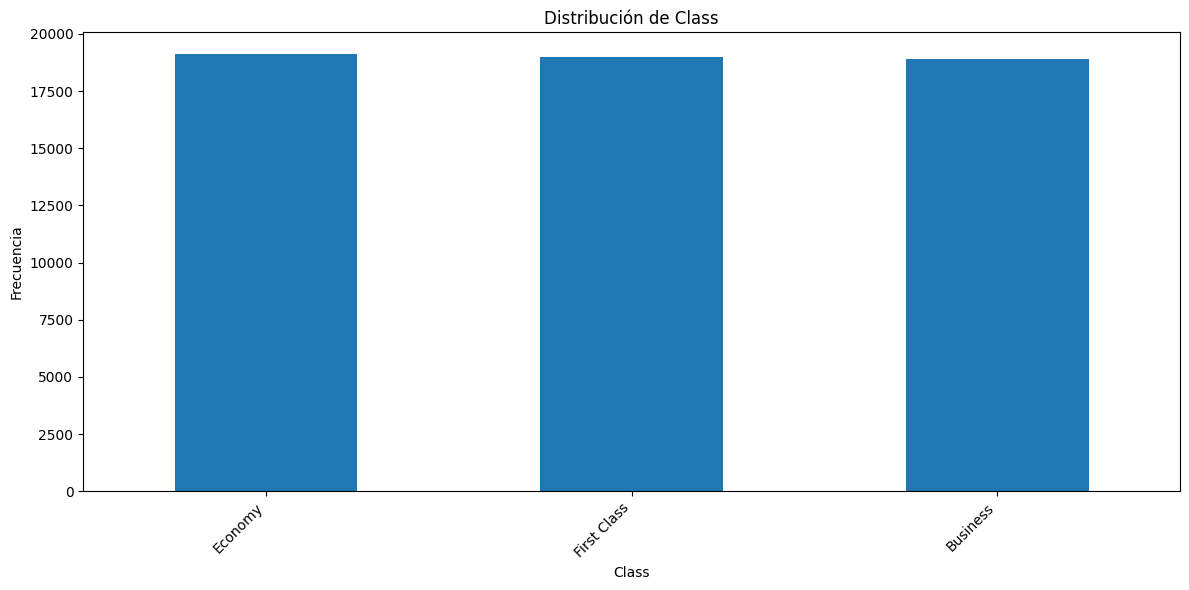


📊 Análisis de Distribución para Class:
Total de categorías: 3

Top 5 Categorías:
Class
Economy        19112
First Class    18979
Business       18909
Name: count, dtype: int64

Porcentajes:
Economy: 33.53%
First Class: 33.30%
Business: 33.17%


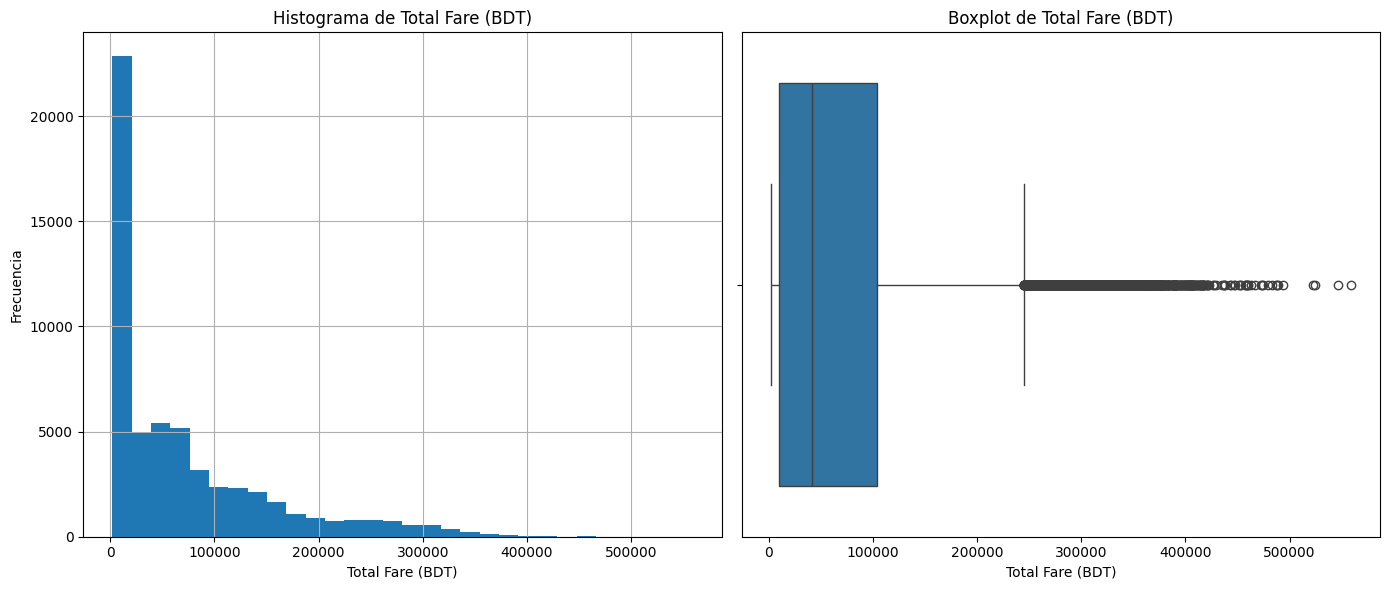


📈 Análisis Estadístico para Total Fare (BDT):
count     57000.000000
mean      71030.316199
std       81769.199536
min        1800.975688
25%        9602.699787
50%       41307.544990
75%      103800.906963
max      558987.332444
Name: Total Fare (BDT), dtype: float64
🔍 Análisis de Distribución General:

--- Airline ---
Airline
US-Bangla Airlines           4496
Vistara                      2368
Lufthansa                    2368
FlyDubai                     2346
Biman Bangladesh Airlines    2344
Name: count, dtype: int64
Total categorías: 24

--- Source ---
Source
CGP    7241
ZYL    7179
JSR    7149
DAC    7146
BZL    7102
Name: count, dtype: int64
Total categorías: 8

--- Source Name ---
Source Name
Shah Amanat International Airport, Chittagong    7241
Osmani International Airport, Sylhet             7179
Jessore Airport                                  7149
Hazrat Shahjalal International Airport, Dhaka    7146
Barisal Airport                                  7102
Name: count, dtype: 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class ClaseDistribucionAnalisis:
    def __init__(self, archivo_csv):
        """
        Inicializar el análisis de distribución de clases

        Parámetros:
        -----------
        archivo_csv : str
            Ruta del archivo CSV a analizar
        """
        try:
            self.df = pd.read_csv(archivo_csv)
            print("✅ Datos cargados exitosamente")
        except FileNotFoundError:
            print("❌ Archivo no encontrado")
            self.df = None

    def distribucion_categorica(self, columna, top_n=10):
        """
        Analizar distribución de una variable categórica

        Parámetros:
        -----------
        columna : str
            Nombre de la columna a analizar
        top_n : int, opcional
            Número de categorías top a mostrar
        """
        if self.df is None:
            return

        # Contar frecuencias
        conteo = self.df[columna].value_counts()

        # Seleccionar top N
        top_conteo = conteo.head(top_n)

        # Gráfico de barras
        plt.figure(figsize=(12, 6))
        top_conteo.plot(kind='bar')
        plt.title(f'Distribución de {columna}')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Información estadística
        print(f"\n📊 Análisis de Distribución para {columna}:")
        print("Total de categorías:", len(conteo))
        print("\nTop 5 Categorías:")
        print(top_conteo)

        # Porcentajes
        porcentajes = (top_conteo / len(self.df)) * 100
        print("\nPorcentajes:")
        for categoria, porcentaje in porcentajes.items():
            print(f"{categoria}: {porcentaje:.2f}%")

    def distribucion_numerica(self, columna):
        """
        Analizar distribución de una variable numérica

        Parámetros:
        -----------
        columna : str
            Nombre de la columna numérica a analizar
        """
        if self.df is None:
            return

        # Gráficos de distribución
        plt.figure(figsize=(14, 6))

        # Histograma
        plt.subplot(1, 2, 1)
        self.df[columna].hist(bins=30)
        plt.title(f'Histograma de {columna}')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=self.df[columna])
        plt.title(f'Boxplot de {columna}')

        plt.tight_layout()
        plt.show()

        # Estadísticas descriptivas
        print(f"\n📈 Análisis Estadístico para {columna}:")
        print(self.df[columna].describe())

    def distribucion_general(self):
        """
        Análisis general de todas las columnas categóricas
        """
        if self.df is None:
            return

        # Identificar columnas categóricas
        categoricas = self.df.select_dtypes(include=['object']).columns

        print("🔍 Análisis de Distribución General:")
        for col in categoricas:
            print(f"\n--- {col} ---")
            conteo = self.df[col].value_counts()
            print(conteo.head())
            print(f"Total categorías: {len(conteo)}")

# Ejemplo de uso
def main():
    # Ruta de tu archivo CSV
    ruta_archivo = "Flight_Price_Dataset_of_Bangladesh.csv"

    # Crear instancia del analizador
    analizador = ClaseDistribucionAnalisis(ruta_archivo)

    # Análisis de distribución para columnas específicas
    analizador.distribucion_categorica('Airline', top_n=10)
    analizador.distribucion_categorica('Class')

    # Análisis de variable numérica
    analizador.distribucion_numerica('Total Fare (BDT)')

    # Análisis general de columnas categóricas
    analizador.distribucion_general()

# Ejecutar script
if __name__ == "__main__":
    main()

✅ Datos cargados exitosamente


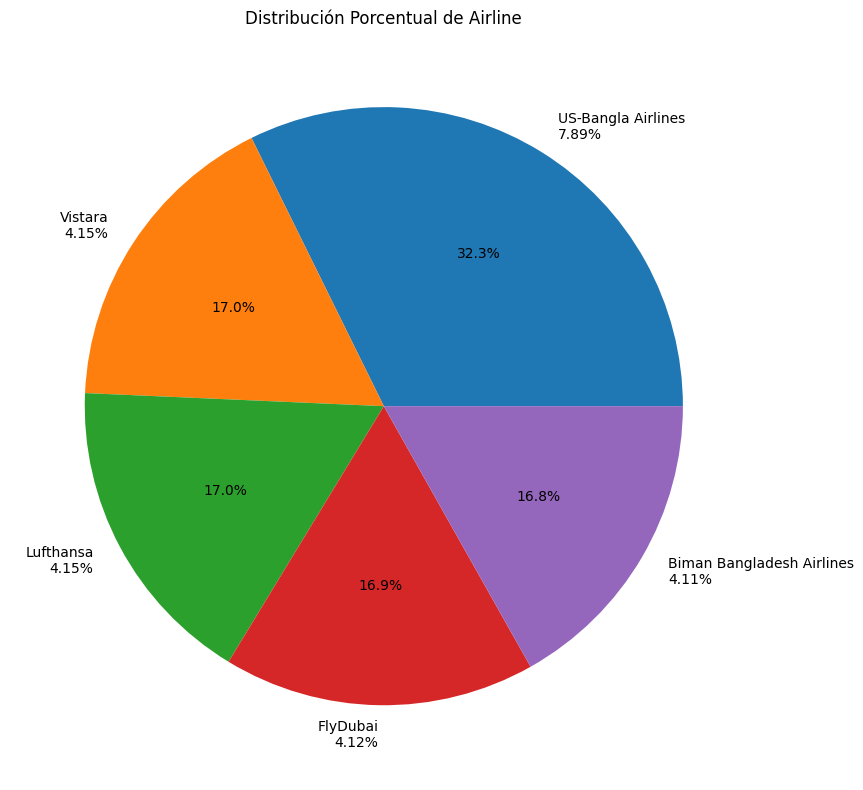


📊 Análisis Porcentual para Airline:

Porcentajes Detallados:
US-Bangla Airlines: 7.89%
Vistara: 4.15%
Lufthansa: 4.15%
FlyDubai: 4.12%
Biman Bangladesh Airlines: 4.11%

Total de categorías únicas: 24
Categoría más común: US-Bangla Airlines (7.89%)
Categoría menos común: SriLankan Airlines (3.86%)


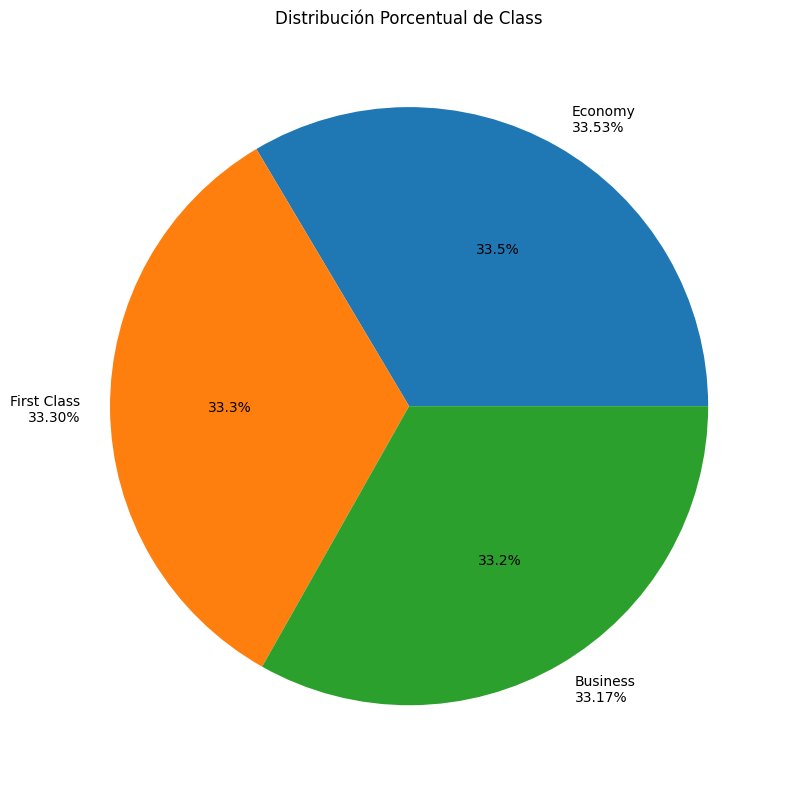


📊 Análisis Porcentual para Class:

Porcentajes Detallados:
Economy: 33.53%
First Class: 33.30%
Business: 33.17%

Total de categorías únicas: 3
Categoría más común: Economy (33.53%)
Categoría menos común: Business (33.17%)

🔍 Resumen Porcentual General:

--- Airline ---
US-Bangla Airlines: 7.89%
Vistara: 4.15%
Lufthansa: 4.15%
FlyDubai: 4.12%
Biman Bangladesh Airlines: 4.11%

--- Source ---
CGP: 12.70%
ZYL: 12.59%
JSR: 12.54%
DAC: 12.54%
BZL: 12.46%

--- Source Name ---
Shah Amanat International Airport, Chittagong: 12.70%
Osmani International Airport, Sylhet: 12.59%
Jessore Airport: 12.54%
Hazrat Shahjalal International Airport, Dhaka: 12.54%
Barisal Airport: 12.46%

--- Destination ---
JED: 5.39%
DEL: 5.38%
JFK: 5.38%
SIN: 5.37%
BKK: 5.33%

--- Destination Name ---
King Abdulaziz International Airport, Jeddah: 5.39%
Indira Gandhi International Airport, Delhi: 5.38%
John F. Kennedy International Airport, New York: 5.38%
Singapore Changi Airport: 5.37%
Suvarnabhumi Airport, Bangkok: 5.

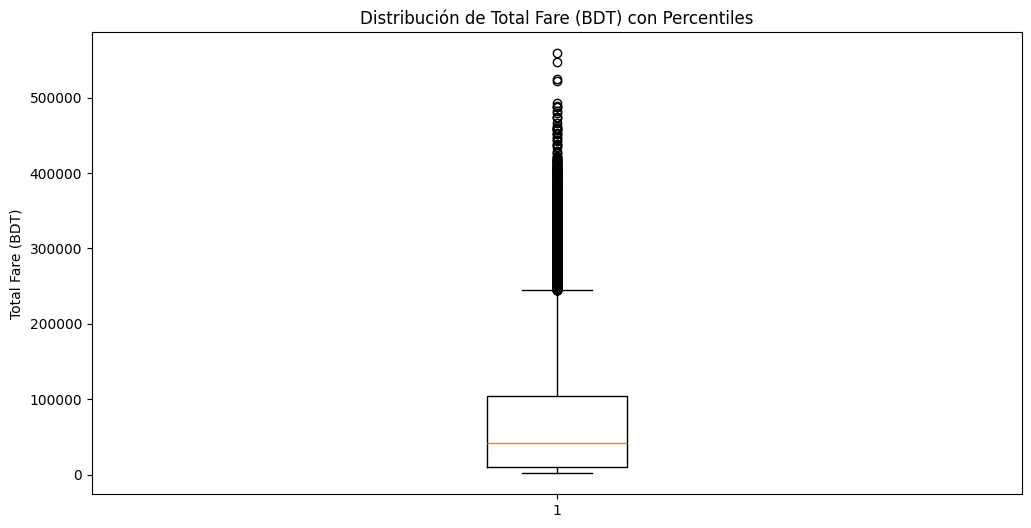


📈 Análisis de Percentiles para Total Fare (BDT):
Percentil 0%: 1800.98
Percentil 25%: 9602.70
Percentil 50%: 41307.54
Percentil 75%: 103800.91
Percentil 90%: 191902.66
Percentil 95%: 258788.93
Percentil 99%: 334019.84
Percentil 100%: 558987.33


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class DistribucionPorcentajes:
    def __init__(self, archivo_csv):
        """
        Inicializar el análisis de distribución de porcentajes

        Parámetros:
        -----------
        archivo_csv : str
            Ruta del archivo CSV a analizar
        """
        try:
            self.df = pd.read_csv(archivo_csv)
            print("✅ Datos cargados exitosamente")
        except FileNotFoundError:
            print("❌ Archivo no encontrado")
            self.df = None

    def porcentajes_categoricos(self, columna, top_n=10):
        """
        Analizar porcentajes de una variable categórica

        Parámetros:
        -----------
        columna : str
            Nombre de la columna a analizar
        top_n : int, opcional
            Número de categorías top a mostrar
        """
        if self.df is None:
            return

        # Calcular porcentajes
        conteo = self.df[columna].value_counts()
        porcentajes = (conteo / len(self.df)) * 100

        # Seleccionar top N
        top_porcentajes = porcentajes.head(top_n)

        # Gráfico de pastel
        plt.figure(figsize=(12, 8))
        plt.pie(top_porcentajes,
                labels=[f'{cat}\n{porc:.2f}%' for cat, porc in top_porcentajes.items()],
                autopct='%1.1f%%')
        plt.title(f'Distribución Porcentual de {columna}')
        plt.tight_layout()
        plt.show()

        # Imprimir porcentajes detallados
        print(f"\n📊 Análisis Porcentual para {columna}:")
        print("\nPorcentajes Detallados:")
        for categoria, porcentaje in top_porcentajes.items():
            print(f"{categoria}: {porcentaje:.2f}%")

        # Información adicional
        print(f"\nTotal de categorías únicas: {len(conteo)}")
        print(f"Categoría más común: {conteo.index[0]} ({porcentajes.iloc[0]:.2f}%)")
        print(f"Categoría menos común: {conteo.index[-1]} ({porcentajes.iloc[-1]:.2f}%)")

    def resumen_porcentual_general(self):
        """
        Generar un resumen porcentual de todas las columnas categóricas
        """
        if self.df is None:
            return

        # Identificar columnas categóricas
        categoricas = self.df.select_dtypes(include=['object']).columns

        print("\n🔍 Resumen Porcentual General:")
        for columna in categoricas:
            print(f"\n--- {columna} ---")
            conteo = self.df[columna].value_counts()
            porcentajes = (conteo / len(self.df)) * 100

            # Mostrar top 5 categorías
            for categoria, porcentaje in porcentajes.head().items():
                print(f"{categoria}: {porcentaje:.2f}%")

    def distribucion_numerica_porcentil(self, columna):
        """
        Análisis de distribución numérica por percentiles

        Parámetros:
        -----------
        columna : str
            Nombre de la columna numérica
        """
        if self.df is None:
            return

        # Calcular percentiles
        percentiles = [0, 25, 50, 75, 90, 95, 99, 100]
        valores_percentiles = self.df[columna].quantile(
            [p/100 for p in percentiles]
        )

        # Visualización
        plt.figure(figsize=(12, 6))
        plt.boxplot(self.df[columna])
        plt.title(f'Distribución de {columna} con Percentiles')
        plt.ylabel(columna)
        plt.show()

        # Imprimir percentiles
        print(f"\n📈 Análisis de Percentiles para {columna}:")
        for percentil, valor in zip(percentiles, valores_percentiles):
            print(f"Percentil {percentil}%: {valor:.2f}")

def main():
    # Ruta de tu archivo CSV
    ruta_archivo = "Flight_Price_Dataset_of_Bangladesh.csv"

    # Crear instancia del analizador
    analizador = DistribucionPorcentajes(ruta_archivo)

    # Análisis de porcentajes para columnas categóricas
    analizador.porcentajes_categoricos('Airline', top_n=5)
    analizador.porcentajes_categoricos('Class')

    # Resumen porcentual general
    analizador.resumen_porcentual_general()

    # Análisis de distribución numérica por percentiles
    analizador.distribucion_numerica_porcentil('Total Fare (BDT)')

# Ejecutar script
if __name__ == "__main__":
    main()